In [4]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods

using BenchmarkTools: @btime
import OrbitalNeuralMethods as onm
import Plots as plt

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`


In [11]:
positions = [0.57771408054589  0.1363957053927  -0.756077757572048
-0.642360456739255  -0.46720024725729  -0.456183925348435
-0.931852908820226  -0.12826293695855  -0.249937748467237
-0.740248238186949  -0.779364238752495  0.0237243333051207
-0.50322233523084  -0.788423181700015  -0.52819167372911]
positions = vec(transpose(positions));

onm.kinetic(positions, wf) * -2
#-8.87960462881331

-8.87960462881331

In [5]:
dims = 3
num = 5

HOshape = [1, 1, 1]
ham = HarmonicOscillator(dims, num, ω = 1, HOshape=HOshape)

wf = Correlated(dims, num, α = 0.4, a = 0.00433)
#wf = SimpleGaussian(dims, num, α = 0.5, HOshape=HOshape)

metro = Importance(equils = 1e4, samples = 1e5, step = 0.01)
#metro = Metropolis(equils = 1e4, samples = 1e5, step = 0.01)

Importance(10000, 100000, 0.01)

In [6]:
optimizer = GradientDescent(lr = 0.01, max_iter = 400, tol = 1e-6);
wf_opt, grad_results = optimize(wf, ham, metro, optimizer, nthreads = 8);
wf_opt.α, grad_results[end].E/num

E = 7.534 iter = 122/400 alpha = 0.49880270068983834          

(0.49880270068983834, 1.506763325287045)

In [7]:
@time block_result = blocking(wf_opt, ham, Importance(equils = 1e5, samples = 1e7, step = 0.01), nthreads = 8)
block_result.E/num

Length of data = 10000000 is not a power of 2, truncating to 8388608 elements
 12.429598 seconds (7.43 M allocations: 1.251 GiB, 3.94% gc time, 39.38% compilation time)


1.5068733385767614

In [8]:
ob_result = onebody(wf_opt, ham, metro, start = -3, stop = 3, length = 100, nthreads = 1);
(; radius, oneBodyDensity) = ob_result;

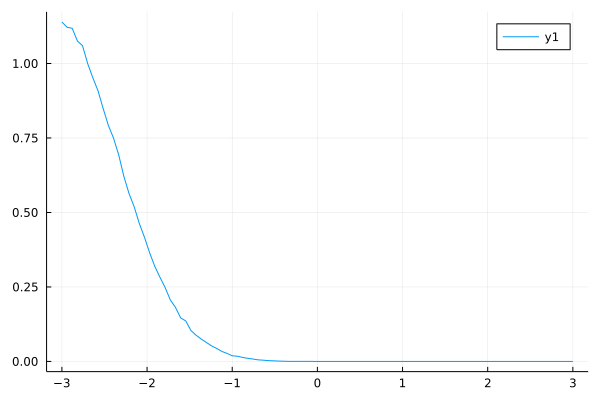

In [10]:
plt.plot(radius, oneBodyDensity)